## HW3 - Asu Tutku Gökçek ##

In [82]:
import math
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

## Q3 ##

In [83]:
data_set = np.genfromtxt("hw03_data_set.csv", delimiter = ",")

training_data = data_set[1:151]
test_data = data_set[151:]

x_train = training_data[:, 0].astype(float)
y_train = training_data[:, 1].astype(float)

N = test_data.shape[0]

x_test = test_data[:, 0].astype(float)
y_test = test_data[:, 1].astype(float)


## Q4 ##

C:\Users\Asu Tutku Gökçek\AppData\Local\Temp\ipykernel_3448\336373953.py:14: RuntimeWarning: invalid value encountered in divide
  g_function4 = (np.asarray([np.sum(((left_borders[b] < x_train) & (x_train <= right_borders[b])) * y_train)


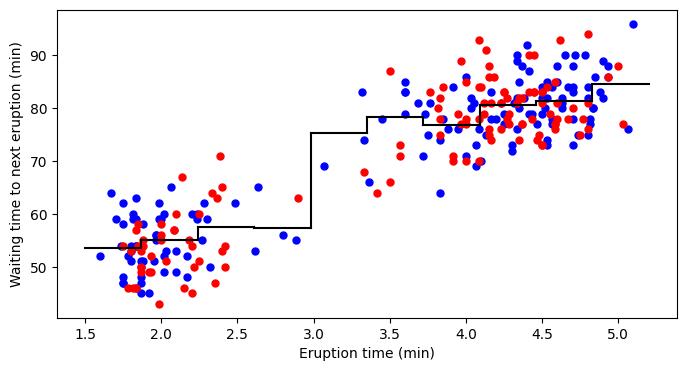

In [84]:
bin_width = 0.37
minimum_value = 1.5
maximum_value = 5.25
data_interval = np.linspace(minimum_value, maximum_value, 160001)

left_borders = np.arange(start = minimum_value,
                         stop = maximum_value,
                         step = bin_width)

right_borders = np.arange(start = minimum_value + bin_width,
                          stop = maximum_value + bin_width,
                          step = bin_width)

g_function4 = (np.asarray([np.sum(((left_borders[b] < x_train) & (x_train <= right_borders[b])) * y_train)
        for b in range(len(left_borders))]))/(np.asarray([np.sum((left_borders[b] < x_train) & (x_train <= right_borders[b])) for b in range(len(left_borders))]))

plt.figure(figsize = (8, 4))
plt.plot(x_train, y_train,  "b.", markersize = 10)
plt.plot(x_test, y_test,  "r.", markersize = 10)
plt.ylabel("Waiting time to next eruption (min)")
plt.xlabel("Eruption time (min)")

for b in range(len(left_borders)):
    plt.plot([left_borders[b], right_borders[b]], [g_function4[b], g_function4[b]], "k-")
for b in range(len(left_borders) - 1):
    plt.plot([right_borders[b], right_borders[b]], [g_function4[b], g_function4[b + 1]], "k-")
plt.show()

## Q5 ##

In [85]:
y_predicted = [(left_borders < x_test[b]) & (x_test[b] <= right_borders) for b in range(len(x_test))] * g_function4
RMSE = np.sqrt((np.sum((y_test-[max(y_predicted[b]) for b in range(len(y_predicted))]) ** 2)) / N)
print(f"Regressogram => RMSE is {RMSE} when h is {bin_width}")


Regressogram => RMSE is 5.962617204275405 when h is 0.37


## Q6 ##

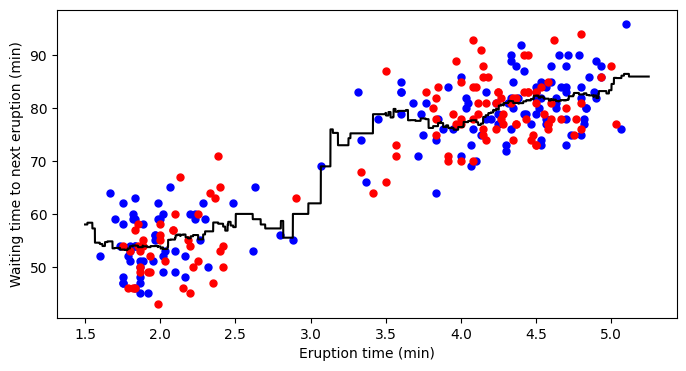

In [86]:
data_interval = np.linspace(minimum_value, maximum_value, 160001)
g_function6 = (np.asarray([np.sum((((np.absolute(x_train - x)) / bin_width) <= 0.5) * y_train) for x in data_interval])) / (np.asarray([np.sum(((np.absolute(x_train - x)) / bin_width) <= 0.5) for x in data_interval]))

plt.figure(figsize = (8, 4))
plt.plot(x_train, y_train,  "b.", markersize = 10)
plt.plot(x_test, y_test,  "r.", markersize = 10)
plt.ylabel("Waiting time to next eruption (min)")
plt.xlabel("Eruption time (min)")

plt.plot(data_interval, g_function6, "k-")
plt.show()

## Q7 ##

In [87]:
step = ((maximum_value - minimum_value) / 160001)
index_of_y_predicted = [(((x_test[b] - 1.5) / step).astype(int)) + 1 for b in range(len(x_test))]
y_predicted = [g_function6[y[b]] for b in range(len(index_of_y_predicted))]

upper2 = (y_predicted - y_test) ** 2

func2 = np.sqrt(np.sum(upper2) / N)
print(f"Running Mean Smoother => RMSE is {func2} when h is {bin_width}")

Running Mean Smoother => RMSE is 6.089003211720321 when h is 0.37


## Q8 ##

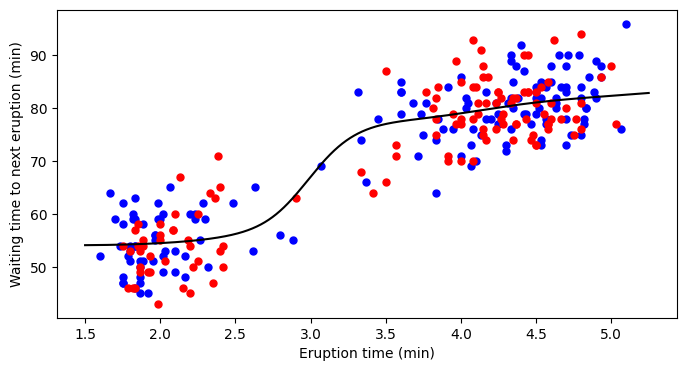

In [88]:
def K(u):
    return (np.exp(-((np.absolute(x_train - u) / bin_width) ** 2) / 2)) / (np.sqrt(2 * np.pi))

g_function8 = (np.asarray([np.sum((K(x)) * y_train) for x in data_interval]))/(np.asarray([np.sum(K(x)) for x in data_interval]))

plt.figure(figsize=(8, 4))
plt.plot(x_train, y_train, "b.", markersize=10)
plt.plot(x_test, y_test, "r.", markersize=10)
plt.ylabel("Waiting time to next eruption (min)")
plt.xlabel("Eruption time (min)")

plt.plot(data_interval, g_function8, "k-")
plt.show()

## Q9 ##

In [89]:
index_of_y_predicted = [(((x_test[b] - 1.5) / step).astype(int)) + 1 for b in range(len(x_test))]
y_predicted = [g_function8[index_of_y_predicted[b]] for b in range(len(index_of_y_predicted))]

RMSE = np.sqrt(np.sum((y_predicted - y_test) ** 2) / N)
print(f"Kernel Smoother => RMSE is {RMSE} when h is {bin_width}")

Kernel Smoother => RMSE is 5.874367215840078 when h is 0.37
